In [2]:
# import required packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import io


In [3]:
# prep settings for the plots for data visualizations
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

pd.options.mode.chained_assignment = None


In [4]:
# import data
from google.colab import files

uploaded = files.upload()

Saving trans.csv to trans.csv


In [ ]:
# read csv file and view data and specs - Account Data
df_account = pd.read_csv(io.BytesIO(uploaded['account.csv']), sep=';')
print(df_account)
df_account.info()

      account_id  district_id         frequency    date
0            576           55  POPLATEK MESICNE  930101
1           3818           74  POPLATEK MESICNE  930101
2            704           55  POPLATEK MESICNE  930101
3           2378           16  POPLATEK MESICNE  930101
4           2632           24  POPLATEK MESICNE  930102
...          ...          ...               ...     ...
4495         124           55  POPLATEK MESICNE  971228
4496        3958           59  POPLATEK MESICNE  971228
4497         777           30  POPLATEK MESICNE  971228
4498        1573           63  POPLATEK MESICNE  971229
4499        3276            1  POPLATEK MESICNE  971229

[4500 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null  

In [ ]:
# read csv file and view data and specs - Cards Data
df_card = pd.read_csv(io.BytesIO(uploaded['card.csv']), sep=';')
print(df_card)
df_card.info()

     card_id  disp_id     type           issued
0       1005     9285  classic  931107 00:00:00
1        104      588  classic  940119 00:00:00
2        747     4915  classic  940205 00:00:00
3         70      439  classic  940208 00:00:00
4        577     3687  classic  940215 00:00:00
..       ...      ...      ...              ...
887      125      694     gold  981226 00:00:00
888      674     4360  classic  981228 00:00:00
889      322     2063  classic  981228 00:00:00
890      685     4467  classic  981229 00:00:00
891      635     4083  classic  981229 00:00:00

[892 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


In [ ]:
# read csv file and view data and specs - Client Data

df_client = pd.read_csv(io.BytesIO(uploaded['client.csv']), sep=';')
print(df_client)
df_client.info()

      client_id  birth_number  district_id
0             1        706213           18
1             2        450204            1
2             3        406009            1
3             4        561201            5
4             5        605703            5
...         ...           ...          ...
5364      13955        456030            1
5365      13956        430406            1
5366      13968        680413           61
5367      13971        626019           67
5368      13998        535812           74

[5369 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


In [ ]:
# read csv file and view data and specs - Type Data

df_type = pd.read_csv(io.BytesIO(uploaded['disp.csv']), sep=';')
print(df_type)
df_type.info()

      disp_id  client_id  account_id       type
0           1          1           1      OWNER
1           2          2           2      OWNER
2           3          3           2  DISPONENT
3           4          4           3      OWNER
4           5          5           3  DISPONENT
...       ...        ...         ...        ...
5364    13647      13955       11349      OWNER
5365    13648      13956       11349  DISPONENT
5366    13660      13968       11359      OWNER
5367    13663      13971       11362      OWNER
5368    13690      13998       11382      OWNER

[5369 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [ ]:
# read csv file and view data and specs - District Data

df_district = pd.read_csv(io.BytesIO(uploaded['district.csv']), sep=';')
print(df_district)
df_district.info()

    A1               A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0    1      Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1    2          Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2    3           Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3    4           Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4    5            Kolin  central Bohemia    95616  65  30   4   1   6   51.4   
..  ..              ...              ...      ...  ..  ..  ..  ..  ..    ...   
72  73            Opava    north Moravia   182027  17  49  12   2   7   56.4   
73  74  Ostrava - mesto    north Moravia   323870   0   0   0   1   1  100.0   
74  75           Prerov    north Moravia   138032  67  30   4   2   5   64.6   
75  76          Sumperk    north Moravia   127369  31  32  13   2   7   51.2   
76  77           Vsetin    north Moravia   148545   8  35  12   3   4   53.5   

      A11   A12   A13  A14    A15    A1

In [ ]:
# read csv file and view data and specs - Loan Data

df_loan = pd.read_csv(io.BytesIO(uploaded['loan.csv']), sep=';')
print(df_loan)
df_loan.info()

     loan_id  account_id    date  amount  duration  payments status
0       5314        1787  930705   96396        12    8033.0      B
1       5316        1801  930711  165960        36    4610.0      A
2       6863        9188  930728  127080        60    2118.0      A
3       5325        1843  930803  105804        36    2939.0      A
4       7240       11013  930906  274740        60    4579.0      A
..       ...         ...     ...     ...       ...       ...    ...
677     4989         105  981205  352704        48    7348.0      C
678     5221        1284  981205   52512        12    4376.0      C
679     6402        6922  981206  139488        24    5812.0      C
680     5346        1928  981206   55632        24    2318.0      C
681     6748        8645  981208  240900        60    4015.0      C

[682 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------    

In [ ]:
# read csv file and view data and specs - Orders Data

df_order = pd.read_csv(io.BytesIO(uploaded['order.csv']), sep=';')
print(df_order)
df_order.info()

      order_id  account_id bank_to  account_to  amount  k_symbol
0        29401           1      YZ    87144583  2452.0      SIPO
1        29402           2      ST    89597016  3372.7      UVER
2        29403           2      QR    13943797  7266.0      SIPO
3        29404           3      WX    83084338  1135.0      SIPO
4        29405           3      CD    24485939   327.0          
...        ...         ...     ...         ...     ...       ...
6466     46334       11362      YZ    70641225  4780.0      SIPO
6467     46335       11362      MN    78507822    56.0          
6468     46336       11362      ST    40799850   330.0  POJISTNE
6469     46337       11362      KL    20009470   129.0          
6470     46338       11362      MN    61540514  5392.0      UVER

[6471 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   or

In [5]:
# read csv file and view data and specs - Transactions Data

df_trans = pd.read_csv(io.BytesIO(uploaded['trans.csv']), sep=';')
print(df_trans)
df_trans.info()

<ipython-input-5-de9761791698>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trans = pd.read_csv(io.BytesIO(uploaded['trans.csv']), sep=';')


         trans_id  account_id    date    type operation  amount  balance  \
0          695247        2378  930101  PRIJEM     VKLAD   700.0    700.0   
1          171812         576  930101  PRIJEM     VKLAD   900.0    900.0   
2          207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0   
3         1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0   
4          579373        1972  930102  PRIJEM     VKLAD   400.0    400.0   
...           ...         ...     ...     ...       ...     ...      ...   
1056315   3626622        2906  981231  PRIJEM       NaN    62.3  13729.4   
1056316   3627616        2935  981231  PRIJEM       NaN    81.3  19544.9   
1056317   3625403        2869  981231  PRIJEM       NaN    60.2  14638.2   
1056318   3626683        2907  981231  PRIJEM       NaN   107.5  23453.0   
1056319   3626540        2902  981231  PRIJEM       NaN   164.1  41642.9   

        k_symbol bank  account  
0            NaN  NaN      NaN  
1            NaN  NaN

In [6]:
df_trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN


In [7]:
# filter for features
df_trans = df_trans[['date', 'account_id', 'type', 'amount']]

# convert the date into date format
df_trans['date'] = pd.to_datetime(df_trans['date'], format='%y%m%d')
df_trans.head()

,date,account_id,type,amount
0,1993-01-01,2378,PRIJEM,700.0
1,1993-01-01,576,PRIJEM,900.0
2,1993-01-01,704,PRIJEM,1000.0
3,1993-01-01,3818,PRIJEM,600.0
4,1993-01-02,1972,PRIJEM,400.0


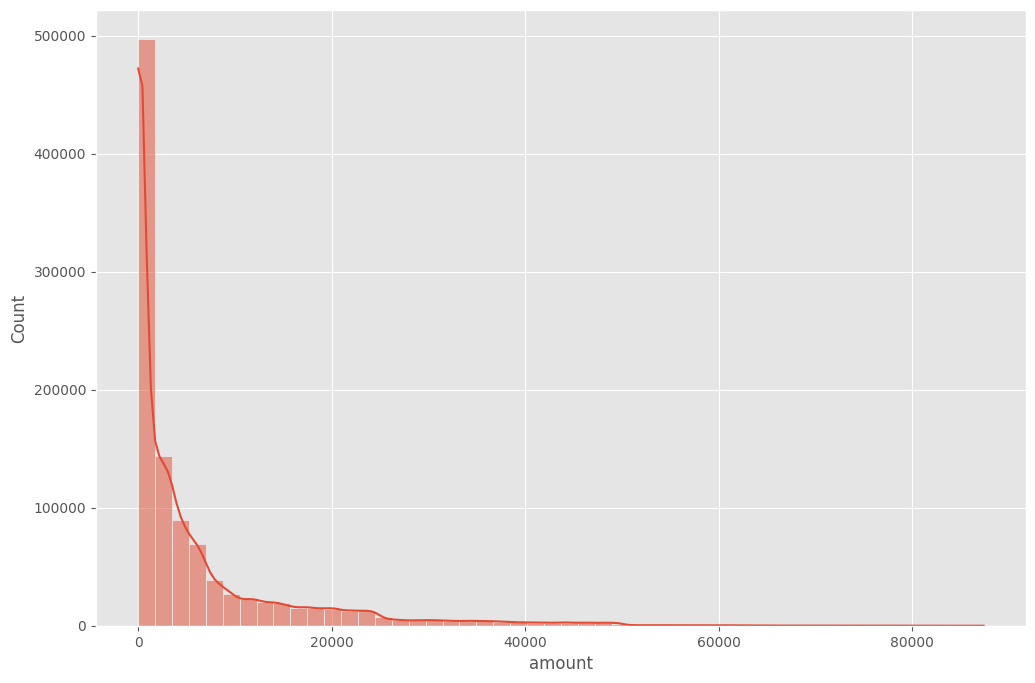

In [8]:
# generate and display a histogram that shows the distribution of transaction amounts to identify any anomalies or outliers in your data.
sns.histplot(df_trans['amount'], kde=True, bins = 50)
plt.show()


#sns.countplot(x='type', data=df_trans)

<Axes: xlabel='type', ylabel='count'>

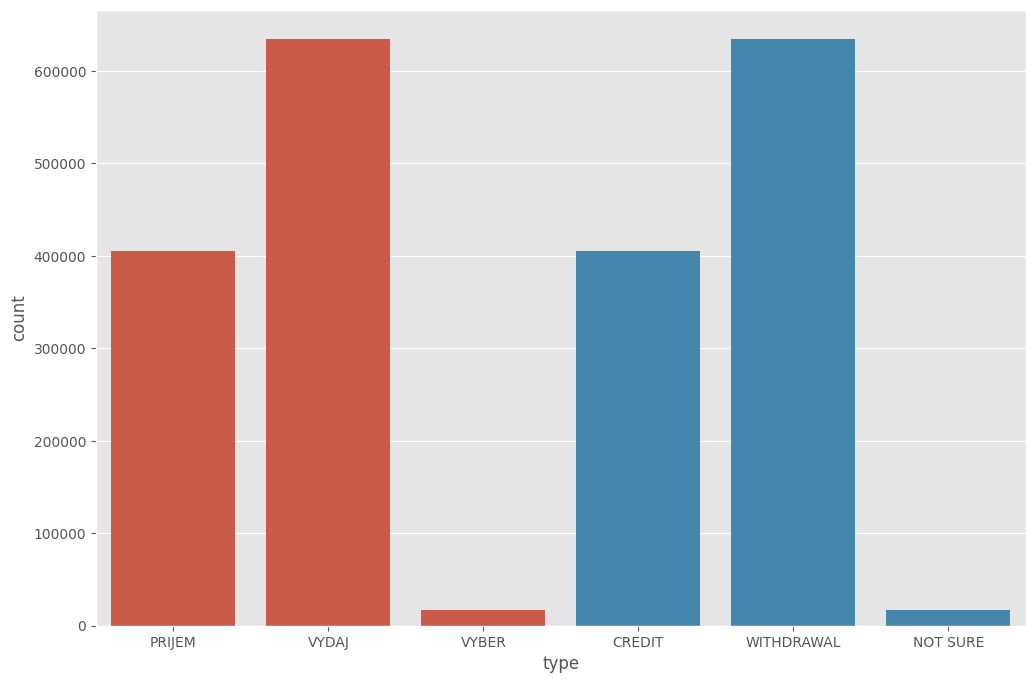

In [9]:
# distribution of different transaction types
sns.countplot(x='type', data=df_trans)

# change the transaction types to English
to_replace = {'PRIJEM': 'CREDIT', 'VYDAJ': 'WITHDRAWAL', 'VYBER': 'NOT SURE'}
df_trans['type'] = df_trans['type'].replace(to_replace)

sns.countplot(x='type', data=df_trans)


In [10]:
# shows all withdrawals by chronological order by account id and date
df_withdrawals = df_trans.query('type == "WITHDRAWAL"').sort_values(by=['account_id', 'date']).set_index('date')

df_withdrawals.head()

,account_id,type,amount
date,,,
1995-06-22,1,WITHDRAWAL,200.0
1995-07-22,1,WITHDRAWAL,5300.0
1995-08-21,1,WITHDRAWAL,7500.0
1995-08-31,1,WITHDRAWAL,14.6
1995-09-05,1,WITHDRAWAL,2452.0


In [11]:
# get the sum of the previous 5 days transaction amounts.
df_withdrawals['sum_5days'] = df_withdrawals.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).sum())

# get the count of the previous 5 days transactions.
df_withdrawals['count_5days'] = df_withdrawals.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).count())

df_withdrawals.head(20)

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1995-06-22,1,WITHDRAWAL,200.0,200.0,1.0
1995-07-22,1,WITHDRAWAL,5300.0,5300.0,1.0
1995-08-21,1,WITHDRAWAL,7500.0,7500.0,1.0
1995-08-31,1,WITHDRAWAL,14.6,14.6,1.0
1995-09-05,1,WITHDRAWAL,2452.0,2452.0,1.0
1995-09-20,1,WITHDRAWAL,700.0,700.0,1.0
1995-09-30,1,WITHDRAWAL,14.6,14.6,1.0
1995-10-05,1,WITHDRAWAL,2452.0,2452.0,1.0
1995-10-20,1,WITHDRAWAL,2900.0,2900.0,1.0


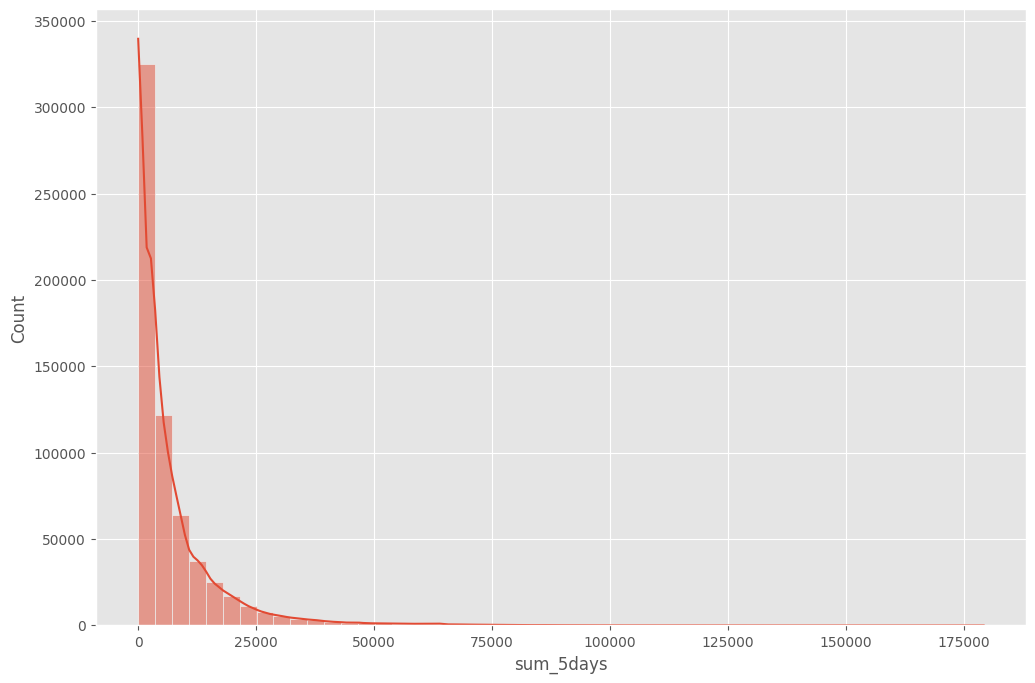

In [12]:
# show distribution of the cumulative amount of withdrawals in the past 5 days
sns.histplot(df_withdrawals['sum_5days'], kde=True, bins=50)
plt.show()

<ipython-input-13-6cdbbbc4ccb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='count_5days', data=df_withdrawals, palette='Set2')


<Axes: xlabel='count_5days', ylabel='count'>

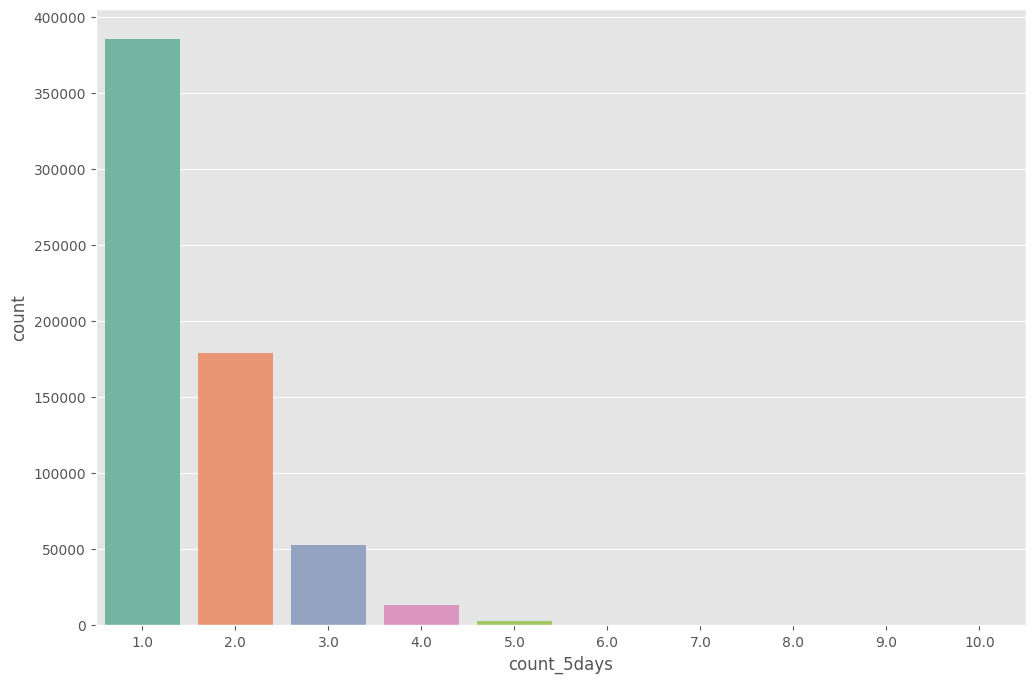

In [13]:
# show distribution of the cumulative count of withdrawals in the past 5 days

sns.countplot(x='count_5days', data=df_withdrawals, palette='Set2')


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


<ipython-input-14-b01a4d98b700>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="count_5days", y="sum_5days",


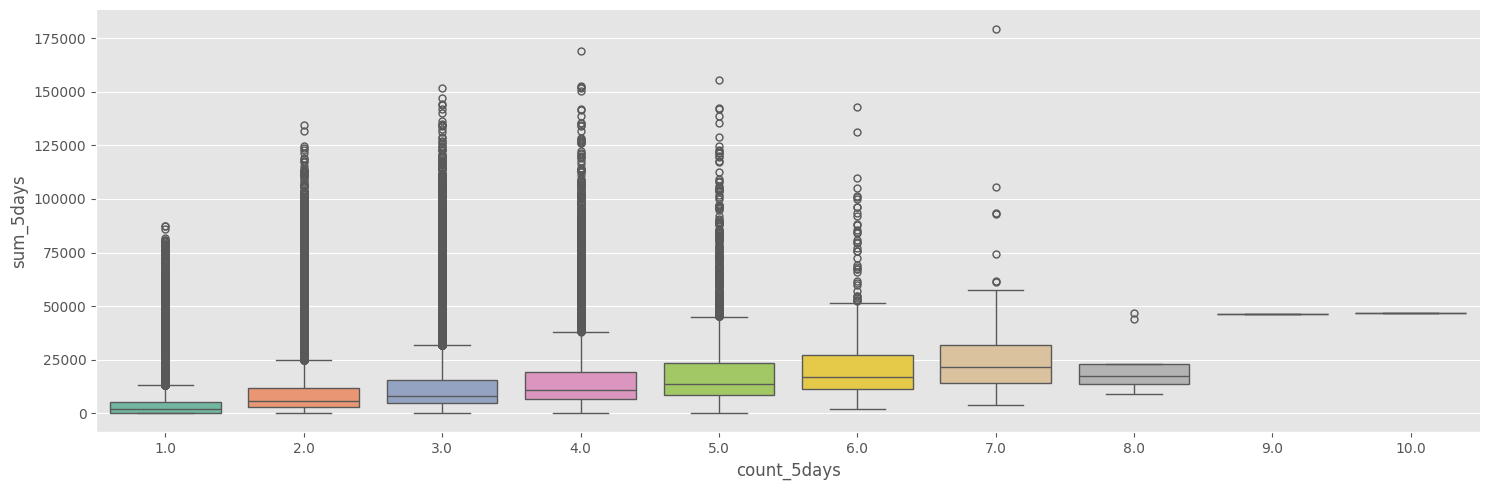

In [14]:
# detailed view of the distribution of transaction sums based on their counts over a 5-day period, making anomalies much easier to spot
print(df_withdrawals['count_5days'].unique())

sns.catplot(x="count_5days", y="sum_5days",
            kind="box", data=df_withdrawals, order=[1., 2., 3., 4., 5., 6., 7., 8., 9., 10.],
            aspect=3.0, palette='Set2')

**Anomaly Detection Model**

In [17]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=06f519ef9c7d30670f11bea53eef014ef7ba6af85adee4421b5f734571558393
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [18]:
# import packages and functions to build, test, and visualize the anomaly detection model using Isolation Forest
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [19]:
# expected proportion of anomalies in the data to be 0.1%
anomaly_proportion = 0.0009

# train IForest detector
# note: by default, Isolation Forest models uses n_estimators=100; this will be used for this example.
# this can be adjusted to tune the model based on the data and performance; More trees generally improve the model’s robustness but also increase computation time
clf_name = 'Anomaly Detection - Isolation Forest'
clf = IForest(contamination=anomaly_proportion)

X = df_withdrawals[['count_5days', 'sum_5days']]
clf.fit(X)


IForest(behaviour='old', bootstrap=False, contamination=0.0009,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=None, verbose=0)

In [20]:
# output prediction labels and outlier scores of the training data
df_withdrawals['y_pred'] = clf.labels_ # labels the prediction to be 0 as inliers and 1 as outliers
df_withdrawals['y_scores'] = clf.decision_scores_ # indicates the raw outlier scores - the bigger the number the greater the anomaly


Text(0, 0.5, '5-day sum of withdrawal transactions')

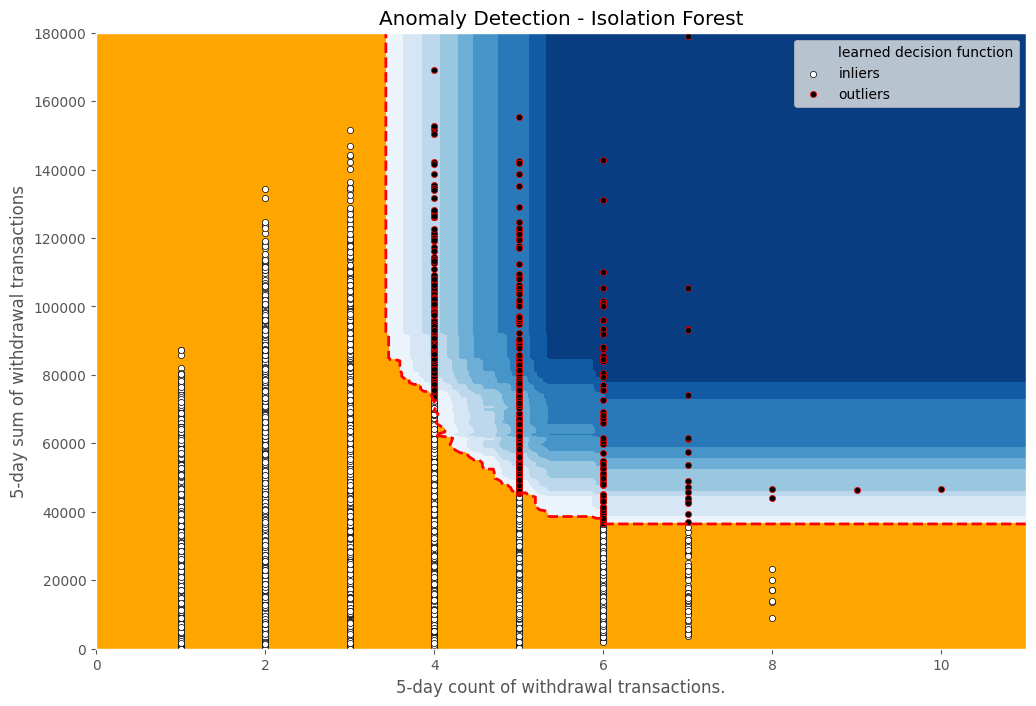

In [21]:
# prepares a grid of anomaly scores over your feature space, which you can use for visualizing the decision boundary of your mode
xx , yy = np.meshgrid(np.linspace(0, 11, 200), np.linspace(0, 180000, 200))

# computes the anomaly score using the decision function of the trained Isolation Forest model
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])*-1

# reshapes the computed scores back into the shape of the mesh grid.
Z = Z.reshape(xx.shape)

# threshold value that helps differentiate between outliers and inliers
# this is set to be halfway between the smallest outlier score and the largest inlier score - aimed for a balanced decision boundary
threshold = (df_withdrawals.loc[df_withdrawals['y_pred'] == 1, 'y_scores'].min()*-1)/2 + (df_withdrawals.loc[df_withdrawals['y_pred'] == 0, 'y_scores'].max()*-1)/2


subplot = plt.subplot(1, 1, 1)

# fill blue colormap from minimum anomaly score to threshold value
# this fills the area below the threshold value using a blue colormap, which helps visualize the inlier region
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

# this draws a red contour line at the threshold value (anomaly score = threshold), clearly marking the decision boundary between inliers and outliers
a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
# this fills the area above the threshold value with orange, highlighting the outlier region
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

# In short:
# Blue: Represent areas with LOW anomaly scores. These regions are considered normal or inliers.
# Red Contour Line: This line acts as a THRESHOLD. It's like a boundary between normal and abnormal. Data points exactly on this line are right on the edge of becoming an anomaly.
# Orange: Represent regions with HIGH anomaly scores. These are the outliers or anomalies.

# creates a mask (boolean array) where True indicates that the row is an inlier (i.e., not an anomaly)
# x data filters only the data that are INLIERS
msk = df_withdrawals['y_pred'] == 0
x = df_withdrawals.loc[msk, ['count_5days', 'sum_5days']].values

# scatter plot of INLIERS with white dots
b = subplot.scatter(x[:, 0], x[:, 1], c='white',s=20, edgecolor='k')

# creates a mask (boolean array) where True indicates that the row is an inlier (i.e., not an anomaly)
# x data filters only the data that are OUTLIERS
msk = df_withdrawals['y_pred'] == 1
x = df_withdrawals.loc[msk, ['count_5days', 'sum_5days']].values

# scatter plot of OUTLIERS with black dots
c = subplot.scatter(x[:, 0], x[:, 1], c='black',s=20, edgecolor='r')
subplot.axis('tight')

# shows the decision function, inliers, and outliers with clear labels and titles
subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'inliers', 'outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='upper right')

subplot.set_title(clf_name)
subplot.set_xlim((0, 11))
subplot.set_ylim((0, 180000))

subplot.set_xlabel("5-day count of withdrawal transactions.")
subplot.set_ylabel("5-day sum of withdrawal transactions")

**Based on this plot, reviews can be done for the following cases within a rolling 5-day period:**
- accounts with 1 withdrawals above 80k USD
- accounts with 4 withdrawals with cumulative 5-day withdrawal above 65k USD
- accounts with 5 or more withdrawals with cumulative 5-day withdrawal above 45k



Note that implementation of these rules for reviewing the anomalous cases must be discussed with the business users and stakeholders before implementing into productions. Factors to consider are (i)interruptions on operations, (ii) sustainability in terms of staff capacity to handle the reviews (depending on actual number of cases based on the anomaly proportion), (iii) limitations of the banking system for real-time decision making.

Recording false positives would also be crucial to integrate into the process so that this data can be used for monitoring the model and incorporating into new supervised models that can be developed in the future for more accurate predictions. Also important to consult experts in the field - Their insights can help verify whether the detected anomalies align with real-world expectations.

**Other ways to improve the model to ensure its effectiveness and reliability:**

**Data Quality:** Ensure your data is clean, well-preprocessed, and representative of the real-world scenarios. Anomalies in the data can significantly impact the model's performance.

**Feature Selection:** Choose relevant features that can effectively distinguish between normal and anomalous transactions. Irrelevant features can reduce the model's accuracy.

**Model Tuning:** Optimize the hyperparameters of the Isolation Forest, such as contamination (the proportion of outliers in the data) and n_estimators (number of trees in the forest), to achieve the best performance.

**Scalability:** Ensure the model can handle the volume of transactions in your production environment. Isolation Forest is generally scalable, but it's important to test it with your specific data.

**Real-time Detection:** If you need real-time anomaly detection, consider the model's inference time and how it integrates with your existing systems.

**False Positives/Negatives:** Be aware of the trade-off between false positives (normal transactions flagged as anomalies) and false negatives (anomalies not detected). Striking the right balance is crucial for practical use.

**Compliance and Privacy**: Ensure that the model complies with relevant regulations and respects user privacy. Anomaly detection in banking transactions often involves sensitive data.

**Human Review:** Incorporate a process for human review of flagged anomalies to verify the model's predictions and provide feedback for continuous improvement.